# Lasso Regression From Scratch

## [You can download the csv file from here](https://github.com/rohan-paul/YT_Data_Sources/blob/main/Lasso%20Regression%20from%20Scratch/data.csv)

Lasso Regression is also another linear model derived from Linear Regression which shares the same hypothetical function for prediction. So in Simple Linear Regression the objective function (also called the cost) to be minimized is just the RSS (Residual Sum of Squares), i.e., the sum of squared errors of the predicted outcome as compared to the actual outcome. This can be depicted mathematically as:

![](assets/2023-05-19-01-34-23.png)

Gradient is nothing but a partial differential of the cost with respect to a particular weight (denoted as wj). The gradient for the jth weight will be:

![](assets/2023-05-19-01-35-38.png)


-----------------

Linear Regression model considers all the features equally relevant for prediction. When there are many features in the dataset and even some of them are not relevant for the predictive model. This makes the model more complex with a too inaccurate prediction on the test set ( or overfitting ). Such a model with high variance does not generalize on the new data. So, Lasso Regression comes for the rescue. It introduced an L1 penalty ( or equal to the absolute value of the magnitude of weights) in the cost function of Linear Regression. The modified cost function for Lasso Regression is given below.

The objective function (also called the cost) to be minimized is the RSS plus the sum of the absolute value of the magnitude of weights. This can be depicted mathematically as:

![](assets/2023-05-19-01-36-35.png)


## A few points about Lasso Regression:

* It’s most often used for eliminating automated variables and the selection of features.

* It’s well-suited for models showing heavy multicollinearity.

* LASSO regression is considered to be better than Ridge as it selects only some features and decreases the coefficients of others to zero.

## The Algorithm

![](assets/2023-05-19-01-40-21.png)    

In [1]:
import pandas as pd
import numpy as np

In [2]:
class LassoRegression:
    """
    This class implements the Lasso Regression model from scratch.
    Lasso regression is a type of linear regression that uses shrinkage.
    Shrinkage is where data values are shrunk towards a central point, like the mean.
    A tuning parameter, lambda controls the strength of the L1 penalty.
    """
    
    def __init__(self, learning_rate= 0.01, n_iters= 1000, lambda_l= 1):
        self.lr = learning_rate
        self.iterations = n_iters
        self.lambda_l = lambda_l
        self.theta = None
        self.bias = None
        self.loss = []
        
    def _linear_model(self, X):
        """
        Compute the linear model for the given feature matrix.

        Args:
            X (numpy.ndarray): the feature matrix to compute.

        Returns:
            numpy.ndarray: the computed linear model.
        """
        return np.dot(X, self.theta) + self.bias

    def _initialize_parameters(self, n_features):
        """
        Initialize the weights and bias with random values.

        Args:
            n_features (int): the number of features in the dataset.
        """
        self.theta = np.random.random_sample(n_features)
        self.bias = np.random.random_sample()

    def _compute_theta_derivative(self, X, y, linear_model):
        """
        Compute the derivative of theta for the given feature matrix, target vector, and linear model.

        Args:
            X (numpy.ndarray): the feature matrix.
            y (numpy.ndarray): the target vector.
            linear_model (numpy.ndarray): the computed linear model.

        Returns:
            numpy.ndarray: the computed derivative of theta.
        """
        n_samples, n_features = X.shape
        d_theta = np.zeros(n_features)

        for j in range(n_features):
            if self.theta[j] > 0:
            #This condition checks whether the current value of the feature coefficient (theta) is positive.
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) + self.lambda_l)
            else:
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) - self.lambda_l)

        return d_theta
    
        

    def _compute_bias_derivative(self, X, y, linear_model):
        """
        Compute the derivative of the bias for the given feature matrix, target vector, and linear model.
        
        Args:
            X (numpy.ndarray): The feature matrix.
            y (numpy.ndarray): The target vector.
            linear_model (numpy.ndarray): The predicted target values (linear model output).

        Returns:
            float: The derivative of the bias.
        """
        d_bias = -(2/X.shape[0]) * np.sum(y - linear_model)
        return d_bias

    def _validate_inputs(self, X, y):
        """
        Validate the dimensions of the feature matrix and the target vector.

        Args:
            X (numpy.ndarray): The feature matrix.
            y (numpy.ndarray): The target vector.

        Raises:
            AssertionError: If the number of samples in the feature matrix and the target vector is not equal.
        """
        assert X.shape[0] == y.shape[0], 'The number of samples in the feature matrix and the target vector should be equal.'

    def _calculate_cost(self, y, z):
        """
        Calculate the Lasso cost (error) for the given target, prediction, and lambda.

        Args:
            y (numpy.ndarray): The true target values.
            z (numpy.ndarray): The predicted target values.

        Returns:
            float: The calculated Lasso cost (root mean squared error + L1 penalty).
        """
        n_samples = y.shape[0] 
        lasso_loss = (1/n_samples) * np.sum(np.square(y - z)) + (self.lambda_l * np.sum(np.abs(self.theta)))
        return np.sqrt(lasso_loss)

    def fit(self, X, y):
        self._validate_inputs(X, y)
        self._initialize_parameters(X.shape[1])

        for _ in range(self.iterations):
            linear_model = self._linear_model(X)
            d_theta = self._compute_theta_derivative(X, y, linear_model)
            d_bias = self._compute_bias_derivative(X, y, linear_model)
            self.theta -= self.lr * d_theta
            self.bias -= self.lr * d_bias
            self.loss.append(self._calculate_cost(y, linear_model))

    def predict(self, X):
        """
        Predict the target value for the given feature matrix.

        Args:
            X (numpy.ndarray): the feature matrix to predict.

        Returns:
            numpy.ndarray: the predicted target values.
        """
        return self._linear_model(X)
    
    def cost(self):
        """
        Return the computed loss for the model.

        Returns:
            list: the list of loss values for each iteration.
        """
        return self.loss 
    
    


## Explanation of `_compute_theta_derivative()`

**`np.dot(X[:, j], (y - linear_model)`** =>  computes the dot product between the j-th feature column of the input data X and the residual errors (y - linear_model). 

`X[:, j]` represents the j-th column of the input data matrix X. It corresponds to the values of the j-th feature across all samples.
    

**`(y - linear_model)`** represents the difference between the true target values (y) and the predicted values (linear_model) obtained by multiplying the feature matrix X with the current coefficient values.

To obtain our predictions, we multiply our weights, W, by our observations, X. Hence, the residuals, or the difference between the true outcome and our prediction can be represented in a N x 1 matrix:

![](assets/2023-05-19-01-17-54.png)
    
**`self.lambda_l`** represents the L1 regularization strength, which is a hyperparameter that determines the amount of penalty applied to the coefficients. It encourages sparsity in the model by shrinking some coefficients to zero.
    
-------------------------------

## The Mathematical Formulaes for the below lines of getting the Gradients of Cost Function w.r.t. theta and bias

```py
for j in range(n_features):
            if self.theta[j] > 0:
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) + self.lambda_l)
            else:
                d_theta[j] = -(2/n_samples) * (np.dot(X[:, j], (y - linear_model)) - self.lambda_l)

```

https://learnerjoy.com/ridge-regression-lasso-regression-elastic-net-regression/

![](assets/2023-05-18-20-24-11.png)


<div style="background: linear-gradient(45deg, #FFC300, #FF5733, #C70039, #900C3F); padding: 10px; border-radius: 5px; display: flex; align-items: center;">
    <h3 style="font-weight: bold; color: white; margin: 0 auto;"> Implement the above Lasso with an example dataset </h3>
</div>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def my_plot(cost):
    iterations = [i for i in range(1, 1001)]
    fig, ax = plt.subplots()
    ax.plot(iterations, cost, color='red')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs Iterations')
    
def surface_plot(X, y, prediction, degree):
    fig = plt.figure(figsize=[30, 50])
    ax = fig.add_subplot(5, 2, degree, projection='3d')
    
    ax.scatter(X[:,0], X[:,1], y, zdir='z', s=20, c='#9467bd', depthshade=True)    
    
    Y_plot = np.asarray(prediction) #converting the prediction data to a numpy array. 
    X = np.asarray(X)
    
    ax.plot_trisurf(X[:, 0], X[:, 1], Y_plot, cmap = 'viridis')
    ax.set_xlabel('$Age$', fontsize=10, rotation=150)
    ax.set_ylabel('$BMI$', fontsize=10, rotation=150)
    ax.set_zlabel('$Insurance$', fontsize=10, rotation=60)
    ax.set_title('Degree: ' + str(degree), fontsize=20)
    plt.show()
    
"""  
ax.scatter(X[:,0], X[:,1], y, zdir='z', s=20, c='#9467bd', depthshade=True)    

X[:,0] and X[:,1] are selecting the first and second columns of the X array, and y is used as the third dimension. These represent the age, BMI and insurance values respectively. 

The 'zdir' parameter sets the direction of the z-axis, in this case, it's pointing up, following the standard orientation. 's' represents the size of the scatter points, and 'c' is the color. The 'depthshade' parameter, when set to True, will shade points based on their z coordinate. 

ax.plot_trisurf(X[:, 0], X[:, 1], Y_plot, cmap = 'viridis')

This line is generating a 3D surface plot using the pyplot object ax. The plot_trisurf function takes three parameters: X[:, 0] and X[:, 1] (age and BMI) and Y_plot (predicted insurance). These 3 parameters represent the x, y, and z coordinates of points respectively

"""

## Data

In [4]:
data = pd.read_csv('../input/data.csv')
data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [5]:
from sklearn.preprocessing import PolynomialFeatures
#  This class is used to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

poly = PolynomialFeatures(4, include_bias= False)

X = data.iloc[:, :3]

X.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


`X = poly.fit_transform(X)`

This line is using the fit_transform method of the PolynomialFeatures instance poly that was created earlier. The fit_transform method first fits the data, then transforms it. 

In this context, fitting refers to learning the model parameters (i.e., the coefficients of the polynomial terms), and transforming refers to applying the learned transformation to the data. 

This means that each feature in your input data will be raised to the power up to the degree you specified (which was 4 in your case) when creating poly. The output is a new feature matrix consisting of all polynomial combinations of the features.

In [6]:
X = poly.fit_transform(X)

""" standardizing features.
first subtracts the mean of each feature (column-wise, as specified by axis=0), and then divides the result by the standard deviation of each feature. This process is also known as z-score normalization or standard scaling. The outcome is that your features will have a mean of 0 and a standard deviation of 1. 
"""
X = (X - X.mean(axis= 0)) / X.std(axis= 0)

y = data.iloc[:, 3]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train = y_train.to_numpy()

y_test = y_test.to_numpy()

In [8]:
lasso = LassoRegression(learning_rate= 0.01, n_iters= 1000, lambda_l= 500)
lasso.fit(X_train, y_train)
y_predicted_l = lasso.predict(X_train)
cost_lasso = lasso.cost()

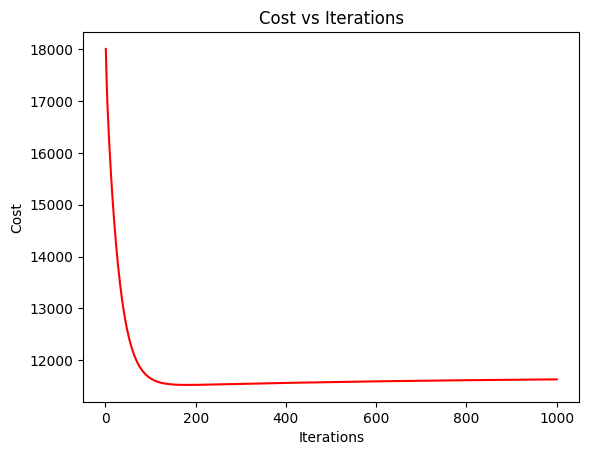

In [9]:
my_plot(cost_lasso)

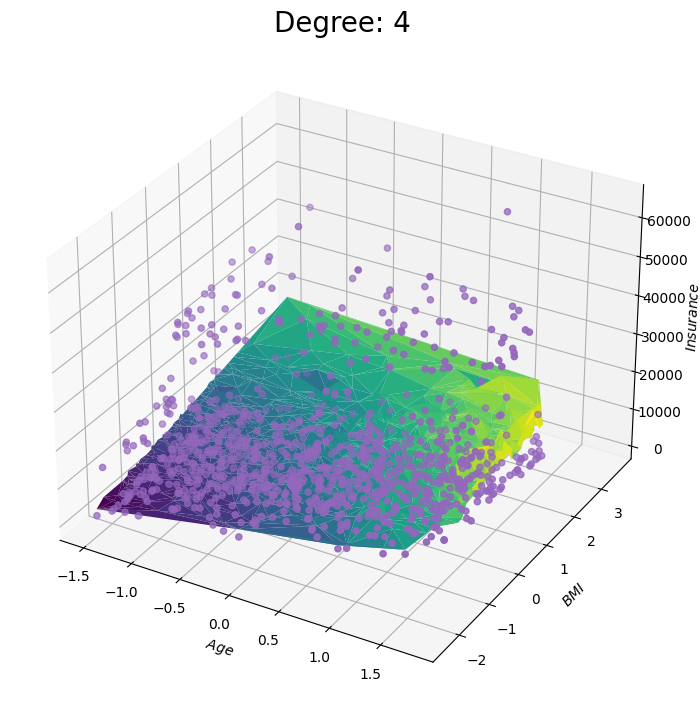

In [10]:
surface_plot(X_train, y_train, y_predicted_l, 4)